## **Multiple Linear Regression**
Pengertian dari multiple linear regresi adalah sebuah model prediksi yang melibatkan lebih dari satu variabel bebas (variabel independen). Hal tersebut juga yang membedakan multiple linier regresi dengan linear regresi.





In [1]:
#import library pyhton untuk proses pengkodean dan visualisasi
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load dan read dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


### **Prepare Dataset**
Membagi variabel yang ada dalam dataset menjadi variabel dependen(y) dan independen(x). Dalam kasus penjualan pie ini data penjualan pie dipengaruhi oleh harga dan promosi yang dilakukan.

In [3]:
#Pembagian variabel dalam dataset
x = df_pie[['price', 'advertising']].astype(float)
y = df_pie['pie_sales'].astype(float)

In [4]:
#penerapan multiple linier regression 
model = smf.ols(formula='pie_sales ~ price + advertising', data=df_pie)
results_formula = model.fit()
results_formula.params

Intercept      306.526193
price          -24.975090
advertising     74.130957
dtype: float64

In [5]:
#persiapan untuk visualisasi data
x_, y_ = np.meshgrid(np.linspace(df_pie.price.min(), df_pie.price.max(), 100),np.linspace(df_pie.advertising.min(), df_pie.max(), 100))
onlyx = pd.DataFrame({'price': x_.ravel(), 'advertising': y_.ravel()})
fittedy=results_formula.predict(exog=onlyx)

In [6]:
#convert hasil dalam bentuk array
fittedy = np.array(fittedy)

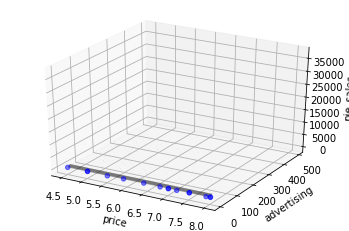

In [7]:
#hasil visualisasi data dengan multiple linear variable beserta dengan prediksi penjualan
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pie['price'],df_pie['advertising'],df_pie['pie_sales'],c='blue', marker='o', alpha=0.5)
ax.plot_surface(x_,y_,fittedy.reshape(x_.shape), color='None', alpha=0.3)
ax.set_xlabel('price')
ax.set_ylabel('advertising')
ax.set_zlabel('pie_sales')
plt.show()


### **Prediksi Penjualan** 
Prediksi penjualan yang dilakukan dengan melakukan penyetelan. Jadi dengan memasukkan angka untuk harga dan promosi yang mempengaruhi total penjualan, kemudian sistem akan memprediksi total penjualan yang akan didapatkan.

In [8]:
#import library untuk proses regresi
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#perhitungan nilai coefficient secara otomatis menggunakan fungsi yang disediakan python
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

             Coefficient
price         -24.975090
advertising    74.130957


In [10]:
#perhitungan nilai intercept secara otomatis menggunakan fungsi yang disediakan python
inter_df = pd.DataFrame(model.intercept_, x.columns, columns=['Intercept'])
print(inter_df)

              Intercept
price        306.526193
advertising  306.526193


In [11]:
#prediksi penjualan pie
price = 5.0
advertising = 3.0
print ('Predicted Pie Sales: \n', model.predict([[price ,advertising]]))

Predicted Pie Sales: 
 [404.04361816]


## **Tabel Informasi Statistik**
Menampilkan tabel lengkap dengan informasi statistik yang dihasilkan oleh library statsmodel. 

Informasi ini dapat memberi informasi tambahan tentang model yang digunakan, seperti kesesuaian model, dan kesalahan standar.

Koefisien yang dihasilkan dalam tabel ini sama dengan koefisien yang dihasilkan oleh sistem secara otomatis sebelumnya dibagian atas dengan fungsi sklearn. Hal ini bagus karena dalam pemodelan ini didapatkan hasil yang konsisten antara fungsi sklearn dan statsmodel.



In [12]:
#regresi dengan statsmodels 
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        16:50:21   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
